# Exploratory Data Analysis (EDA)
## Sleep and Phone Usage Study

This notebook contains comprehensive exploratory data analysis of the 30-day sleep and phone usage dataset.


## 1. Import Libraries and Load Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/sleep_phone_data.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
df.head()


Dataset shape: (30, 9)

Date range: 2024-11-01 00:00:00 to 2024-11-30 00:00:00


,date,sleep_duration_hours,bedtime,wake_time,last_phone_use_minutes_before_sleep,total_screen_time_hours,screen_time_before_sleep_min,morning_tiredness_1_5,energy_level_1_5
0,2024-11-01,7.2,22:00,07:15,25,4.9,36,4,2
1,2024-11-02,7.4,23:37,07:01,32,8.6,28,4,2
2,2024-11-03,7.4,23:30,07:27,64,7.7,59,3,2
3,2024-11-04,6.0,23:06,07:07,52,6.7,63,4,1
4,2024-11-05,7.1,23:27,07:12,50,6.5,22,3,2


## 2. Data Overview and Basic Information


In [3]:
# Basic information
print("Dataset Info:")
print("=" * 50)
df.info()

print("\n\nFirst 10 rows:")
print("=" * 50)
df.head(10)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 30 non-null     datetime64[ns]
 1   sleep_duration_hours                 30 non-null     float64       
 2   bedtime                              30 non-null     object        
 3   wake_time                            30 non-null     object        
 4   last_phone_use_minutes_before_sleep  30 non-null     int64         
 5   total_screen_time_hours              30 non-null     float64       
 6   screen_time_before_sleep_min         30 non-null     int64         
 7   morning_tiredness_1_5                30 non-null     int64         
 8   energy_level_1_5                     30 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.2+ KB


,date,sleep_duration_hours,bedtime,wake_time,last_phone_use_minutes_before_sleep,total_screen_time_hours,screen_time_before_sleep_min,morning_tiredness_1_5,energy_level_1_5
0,2024-11-01,7.2,22:00,07:15,25,4.9,36,4,2
1,2024-11-02,7.4,23:37,07:01,32,8.6,28,4,2
2,2024-11-03,7.4,23:30,07:27,64,7.7,59,3,2
3,2024-11-04,6.0,23:06,07:07,52,6.7,63,4,1
4,2024-11-05,7.1,23:27,07:12,50,6.5,22,3,2
5,2024-11-06,7.9,23:42,07:37,38,5.9,31,3,2
6,2024-11-07,9.3,23:42,09:00,15,5.2,33,2,4
7,2024-11-08,7.8,23:36,07:22,97,4.5,87,3,2
8,2024-11-09,8.1,00:17,08:23,34,7.5,48,4,1
9,2024-11-10,7.6,23:52,07:27,22,9.0,10,2,3


## 3. Missing Values Check


In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print("Missing Values Found:")
    print(missing_df)
else:
    print("✓ No missing values in the dataset!")


✓ No missing values in the dataset!


## 4. Descriptive Statistics


In [5]:
# Descriptive statistics for numeric variables
numeric_cols = ['sleep_duration_hours', 'last_phone_use_minutes_before_sleep', 
                'total_screen_time_hours', 'screen_time_before_sleep_min',
                'morning_tiredness_1_5', 'energy_level_1_5']

print("Descriptive Statistics:")
print("=" * 80)
desc_stats = df[numeric_cols].describe()
print(desc_stats.round(2))


Descriptive Statistics:
       sleep_duration_hours  last_phone_use_minutes_before_sleep  \
count                 30.00                                30.00   
mean                   7.80                                48.07   
std                    0.92                                25.11   
min                    6.00                                 5.00   
25%                    7.22                                32.50   
50%                    7.65                                45.00   
75%                    8.10                                66.00   
max                   10.00                                97.00   

       total_screen_time_hours  screen_time_before_sleep_min  \
count                    30.00                         30.00   
mean                      6.74                         44.37   
std                       1.36                         23.98   
min                       4.50                          0.00   
25%                       6.20             

## 5. Distribution Analysis


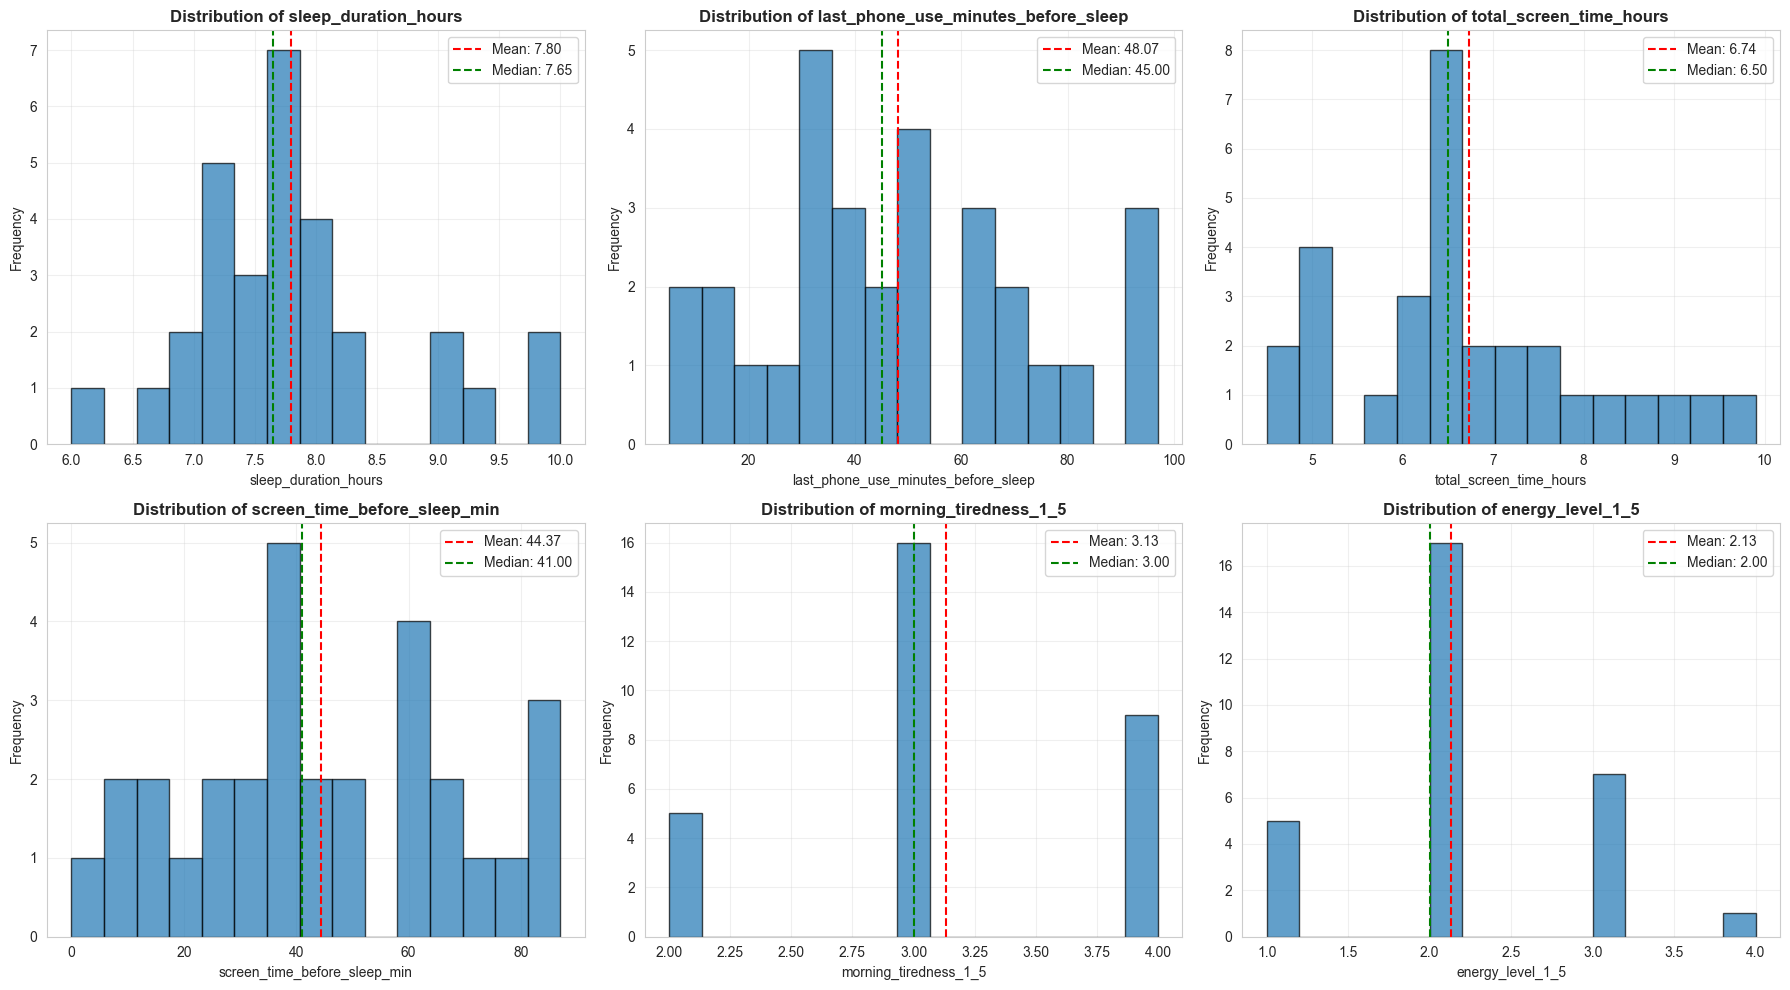

In [6]:
# Distribution plots for key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=15, edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


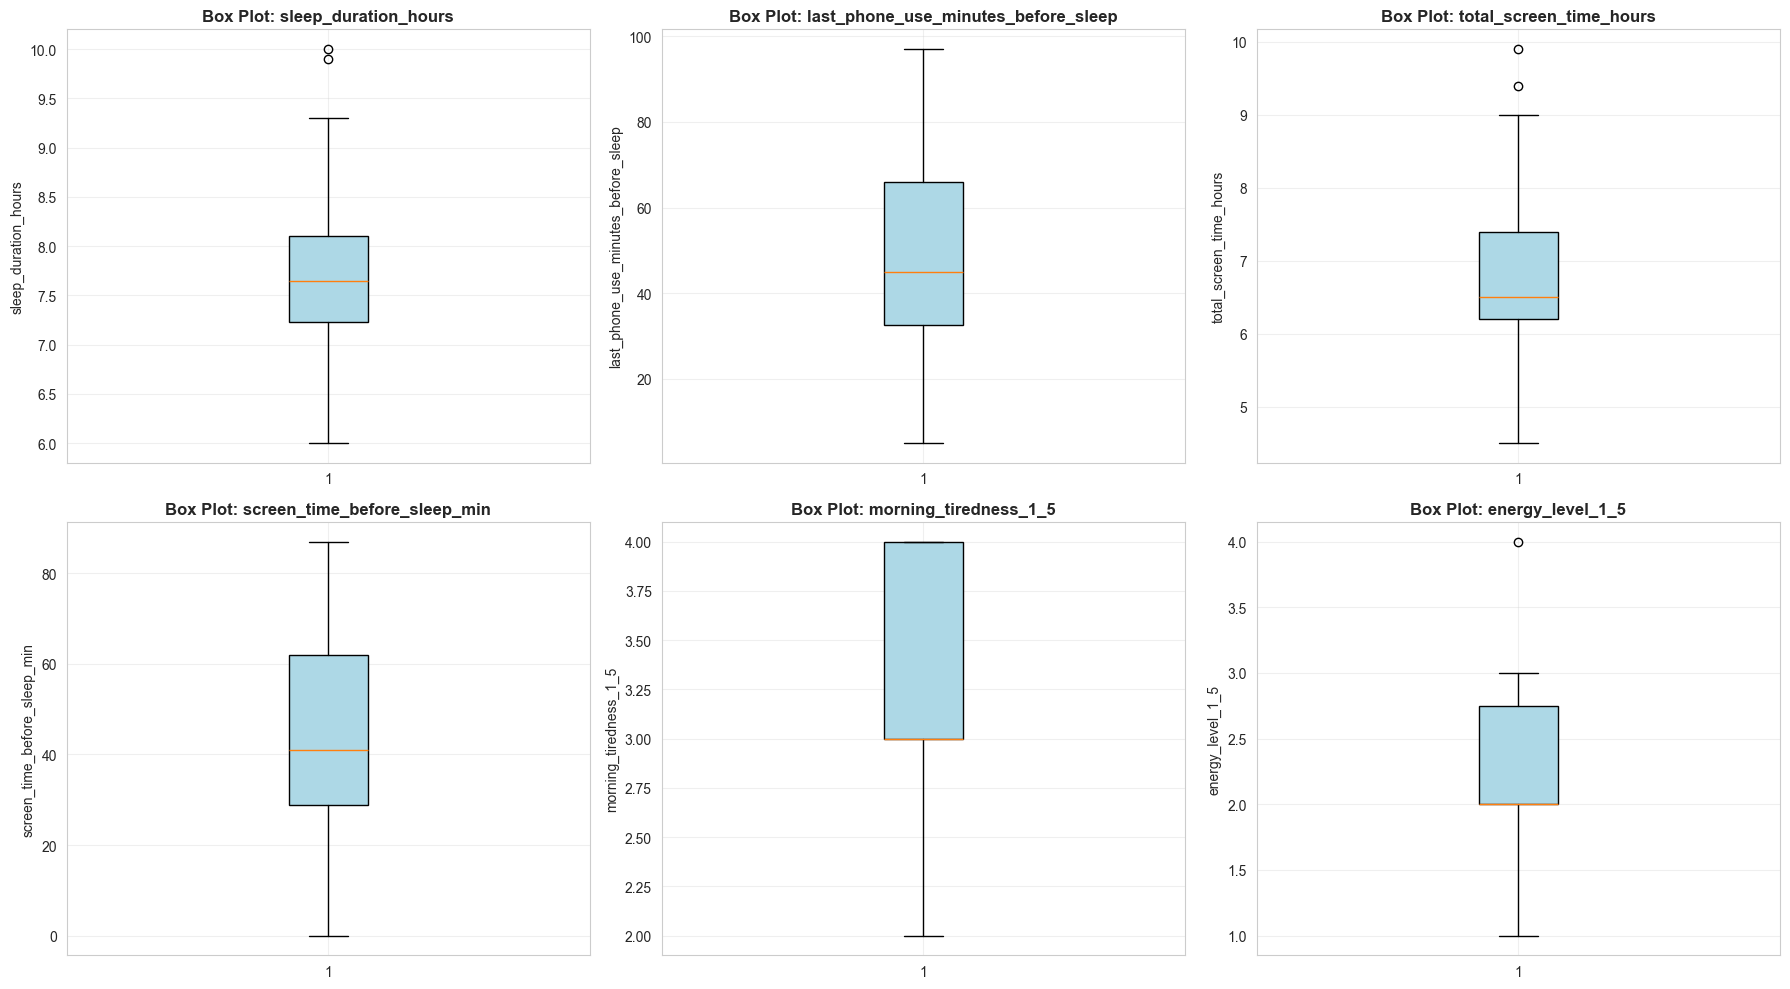

In [7]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    box = axes[i].boxplot(df[col], vert=True, patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Outlier Detection


In [8]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (IQR Method):")
print("=" * 80)

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"  Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
        print(f"  Number of outliers: {len(outliers)}")
        print(f"  Outlier values: {outliers[col].tolist()}")
    else:
        print(f"\n{col}: No outliers detected")


Outlier Detection (IQR Method):

sleep_duration_hours:
  Lower bound: 5.91, Upper bound: 9.41
  Number of outliers: 2
  Outlier values: [9.9, 10.0]

last_phone_use_minutes_before_sleep: No outliers detected

total_screen_time_hours:
  Lower bound: 4.40, Upper bound: 9.20
  Number of outliers: 2
  Outlier values: [9.9, 9.4]

screen_time_before_sleep_min: No outliers detected

morning_tiredness_1_5: No outliers detected

energy_level_1_5:
  Lower bound: 0.88, Upper bound: 3.88
  Number of outliers: 1
  Outlier values: [4]


## 7. Correlation Analysis


In [9]:
# Correlation matrix
correlation_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print("=" * 80)
print(correlation_matrix.round(3))


Correlation Matrix:
                                     sleep_duration_hours  \
sleep_duration_hours                                1.000   
last_phone_use_minutes_before_sleep                -0.283   
total_screen_time_hours                             0.139   
screen_time_before_sleep_min                       -0.455   
morning_tiredness_1_5                              -0.557   
energy_level_1_5                                    0.640   

                                     last_phone_use_minutes_before_sleep  \
sleep_duration_hours                                              -0.283   
last_phone_use_minutes_before_sleep                                1.000   
total_screen_time_hours                                           -0.023   
screen_time_before_sleep_min                                       0.822   
morning_tiredness_1_5                                              0.134   
energy_level_1_5                                                  -0.226   

                   

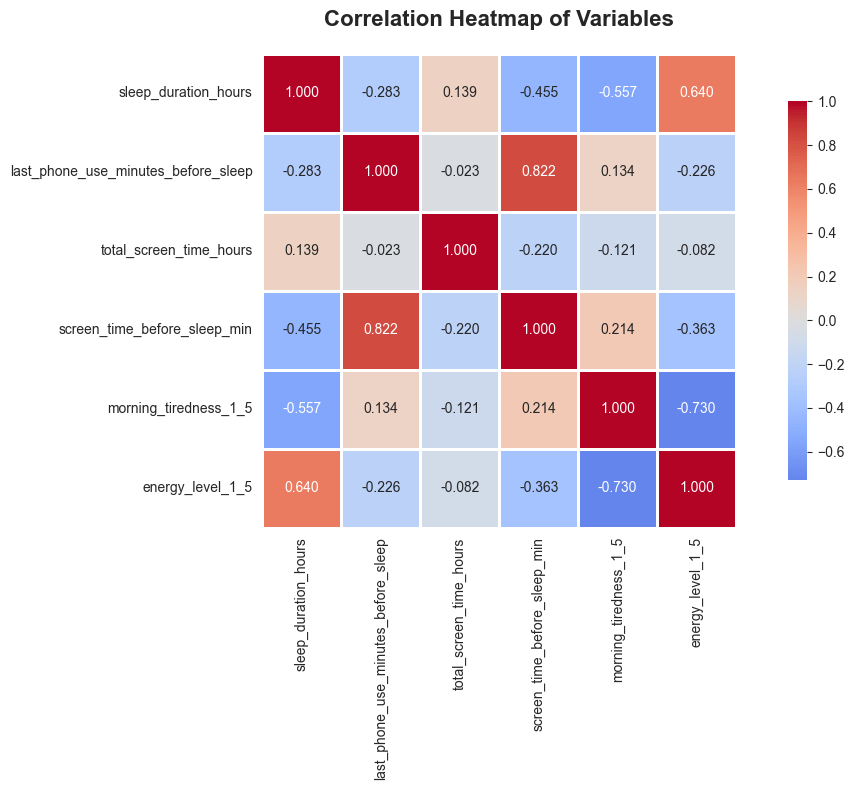

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [11]:
# Key correlations for hypotheses
print("Key Correlations for Research Hypotheses:")
print("=" * 80)

corr1 = df['screen_time_before_sleep_min'].corr(df['sleep_duration_hours'])
corr2 = df['sleep_duration_hours'].corr(df['morning_tiredness_1_5'])
corr3 = df['total_screen_time_hours'].corr(df['energy_level_1_5'])

print(f"\nH1: Phone usage before bed vs Sleep duration:")
print(f"   Correlation: {corr1:.3f}")

print(f"\nH2: Sleep duration vs Morning tiredness:")
print(f"   Correlation: {corr2:.3f}")

print(f"\nH3: Total screen time vs Daily energy:")
print(f"   Correlation: {corr3:.3f}")


Key Correlations for Research Hypotheses:

H1: Phone usage before bed vs Sleep duration:
   Correlation: -0.455

H2: Sleep duration vs Morning tiredness:
   Correlation: -0.557

H3: Total screen time vs Daily energy:
   Correlation: -0.082


## 8. Time Series Analysis


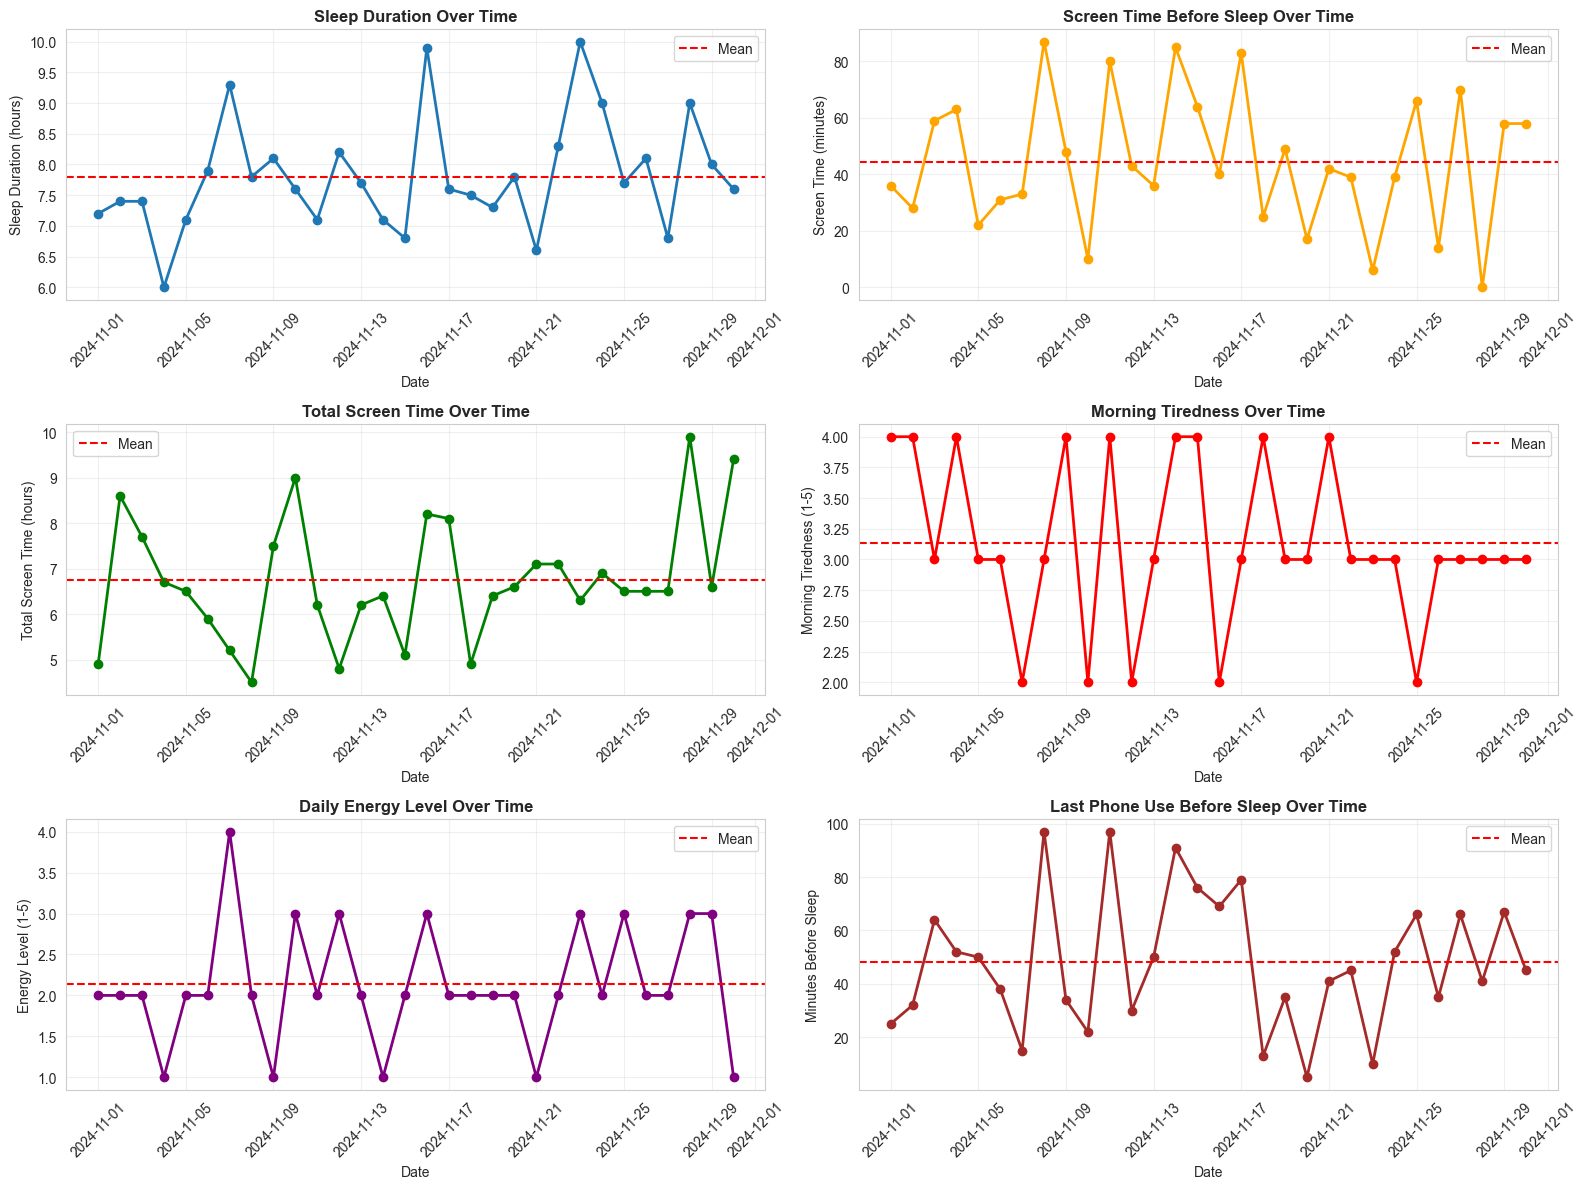

In [12]:
# Add day of week
df['day_of_week'] = df['date'].dt.day_name()
df['day_number'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['day_number'].apply(lambda x: 1 if x >= 5 else 0)

# Time series plots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Sleep duration over time
axes[0, 0].plot(df['date'], df['sleep_duration_hours'], marker='o', linewidth=2, markersize=6)
axes[0, 0].axhline(df['sleep_duration_hours'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].set_title('Sleep Duration Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sleep Duration (hours)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Screen time before sleep over time
axes[0, 1].plot(df['date'], df['screen_time_before_sleep_min'], marker='o', linewidth=2, markersize=6, color='orange')
axes[0, 1].axhline(df['screen_time_before_sleep_min'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 1].set_title('Screen Time Before Sleep Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Screen Time (minutes)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Total screen time over time
axes[1, 0].plot(df['date'], df['total_screen_time_hours'], marker='o', linewidth=2, markersize=6, color='green')
axes[1, 0].axhline(df['total_screen_time_hours'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].set_title('Total Screen Time Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Screen Time (hours)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Morning tiredness over time
axes[1, 1].plot(df['date'], df['morning_tiredness_1_5'], marker='o', linewidth=2, markersize=6, color='red')
axes[1, 1].axhline(df['morning_tiredness_1_5'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 1].set_title('Morning Tiredness Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Morning Tiredness (1-5)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# Energy level over time
axes[2, 0].plot(df['date'], df['energy_level_1_5'], marker='o', linewidth=2, markersize=6, color='purple')
axes[2, 0].axhline(df['energy_level_1_5'].mean(), color='r', linestyle='--', label='Mean')
axes[2, 0].set_title('Daily Energy Level Over Time', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Energy Level (1-5)')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].tick_params(axis='x', rotation=45)

# Last phone use before sleep over time
axes[2, 1].plot(df['date'], df['last_phone_use_minutes_before_sleep'], marker='o', linewidth=2, markersize=6, color='brown')
axes[2, 1].axhline(df['last_phone_use_minutes_before_sleep'].mean(), color='r', linestyle='--', label='Mean')
axes[2, 1].set_title('Last Phone Use Before Sleep Over Time', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Minutes Before Sleep')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 9. Weekday vs Weekend Comparison


In [13]:
# Compare weekday vs weekend
weekday_data = df[df['is_weekend'] == 0]
weekend_data = df[df['is_weekend'] == 1]

print("Weekday vs Weekend Comparison:")
print("=" * 80)

comparison_cols = ['sleep_duration_hours', 'total_screen_time_hours', 
                   'screen_time_before_sleep_min', 'morning_tiredness_1_5', 'energy_level_1_5']

for col in comparison_cols:
    print(f"\n{col}:")
    print(f"  Weekday - Mean: {weekday_data[col].mean():.2f}, Std: {weekday_data[col].std():.2f}")
    print(f"  Weekend - Mean: {weekend_data[col].mean():.2f}, Std: {weekend_data[col].std():.2f}")


Weekday vs Weekend Comparison:

sleep_duration_hours:
  Weekday - Mean: 7.59, Std: 0.78
  Weekend - Mean: 8.29, Std: 1.06

total_screen_time_hours:
  Weekday - Mean: 6.21, Std: 1.16
  Weekend - Mean: 7.97, Std: 0.99

screen_time_before_sleep_min:
  Weekday - Mean: 45.71, Std: 24.25
  Weekend - Mean: 41.22, Std: 24.46

morning_tiredness_1_5:
  Weekday - Mean: 3.19, Std: 0.68
  Weekend - Mean: 3.00, Std: 0.71

energy_level_1_5:
  Weekday - Mean: 2.14, Std: 0.73
  Weekend - Mean: 2.11, Std: 0.78


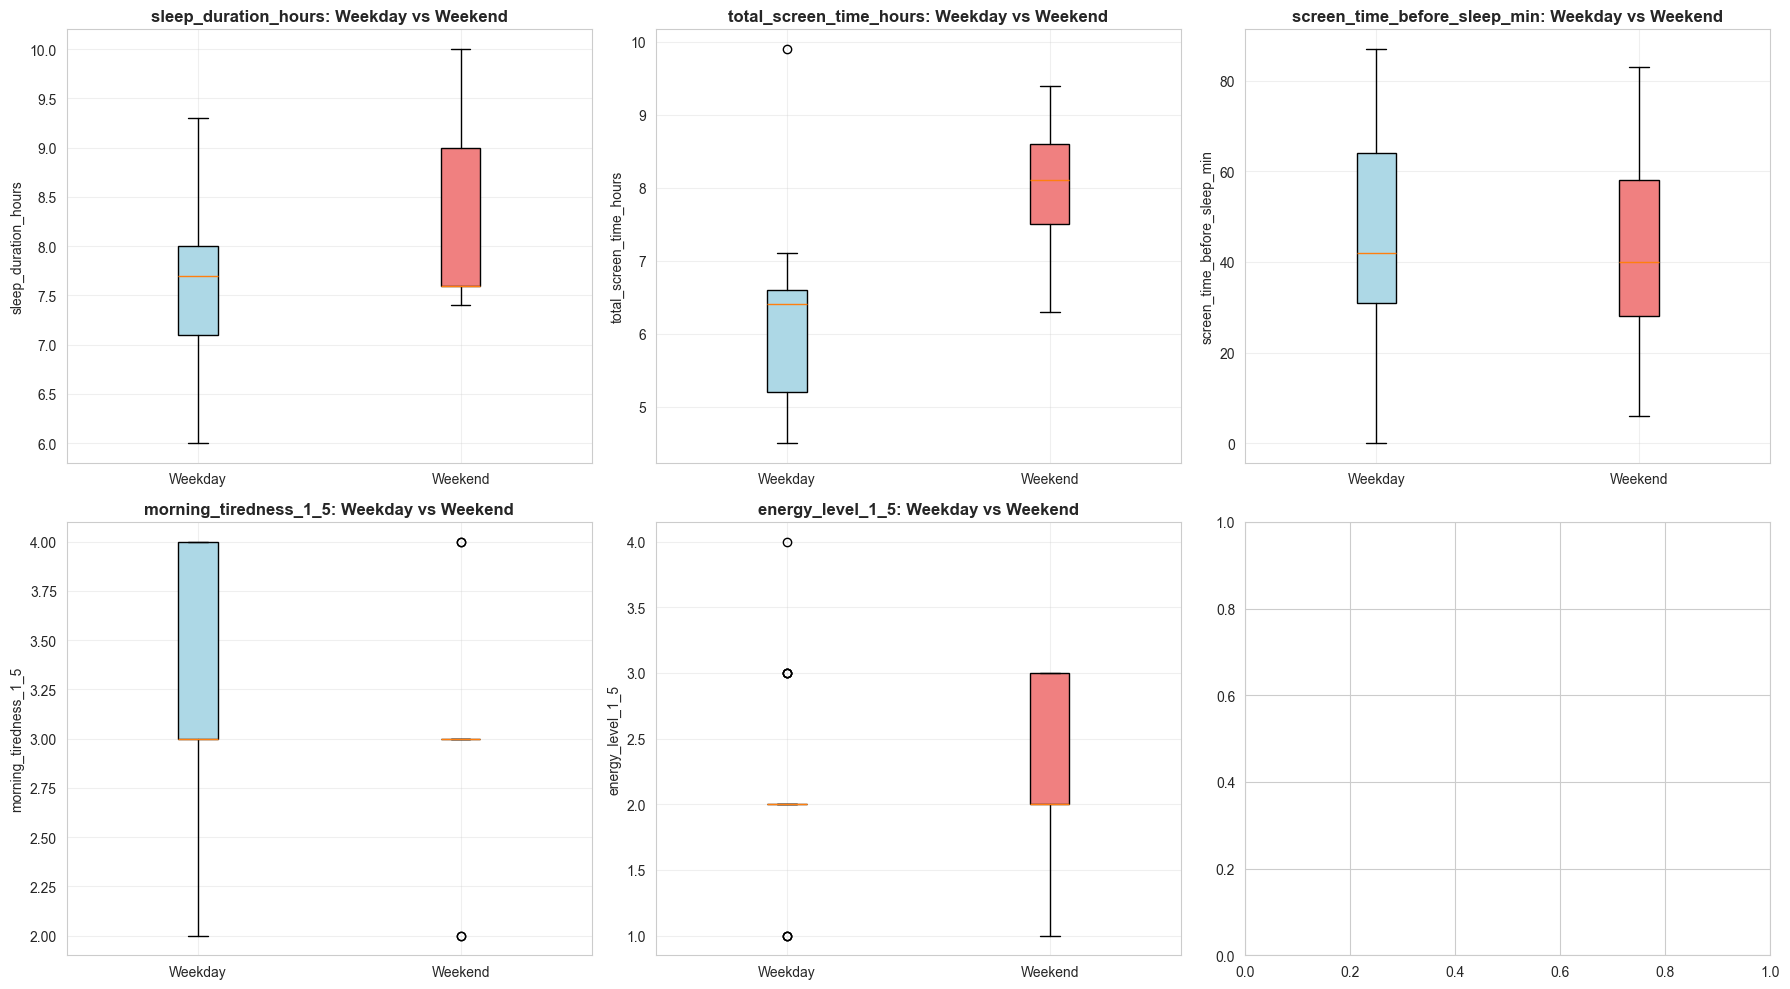

In [14]:
# Box plots: Weekday vs Weekend
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(comparison_cols):
    data_to_plot = [weekday_data[col], weekend_data[col]]
    bp = axes[i].boxplot(data_to_plot, labels=['Weekday', 'Weekend'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[i].set_title(f'{col}: Weekday vs Weekend', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 10. Key Relationship Visualizations


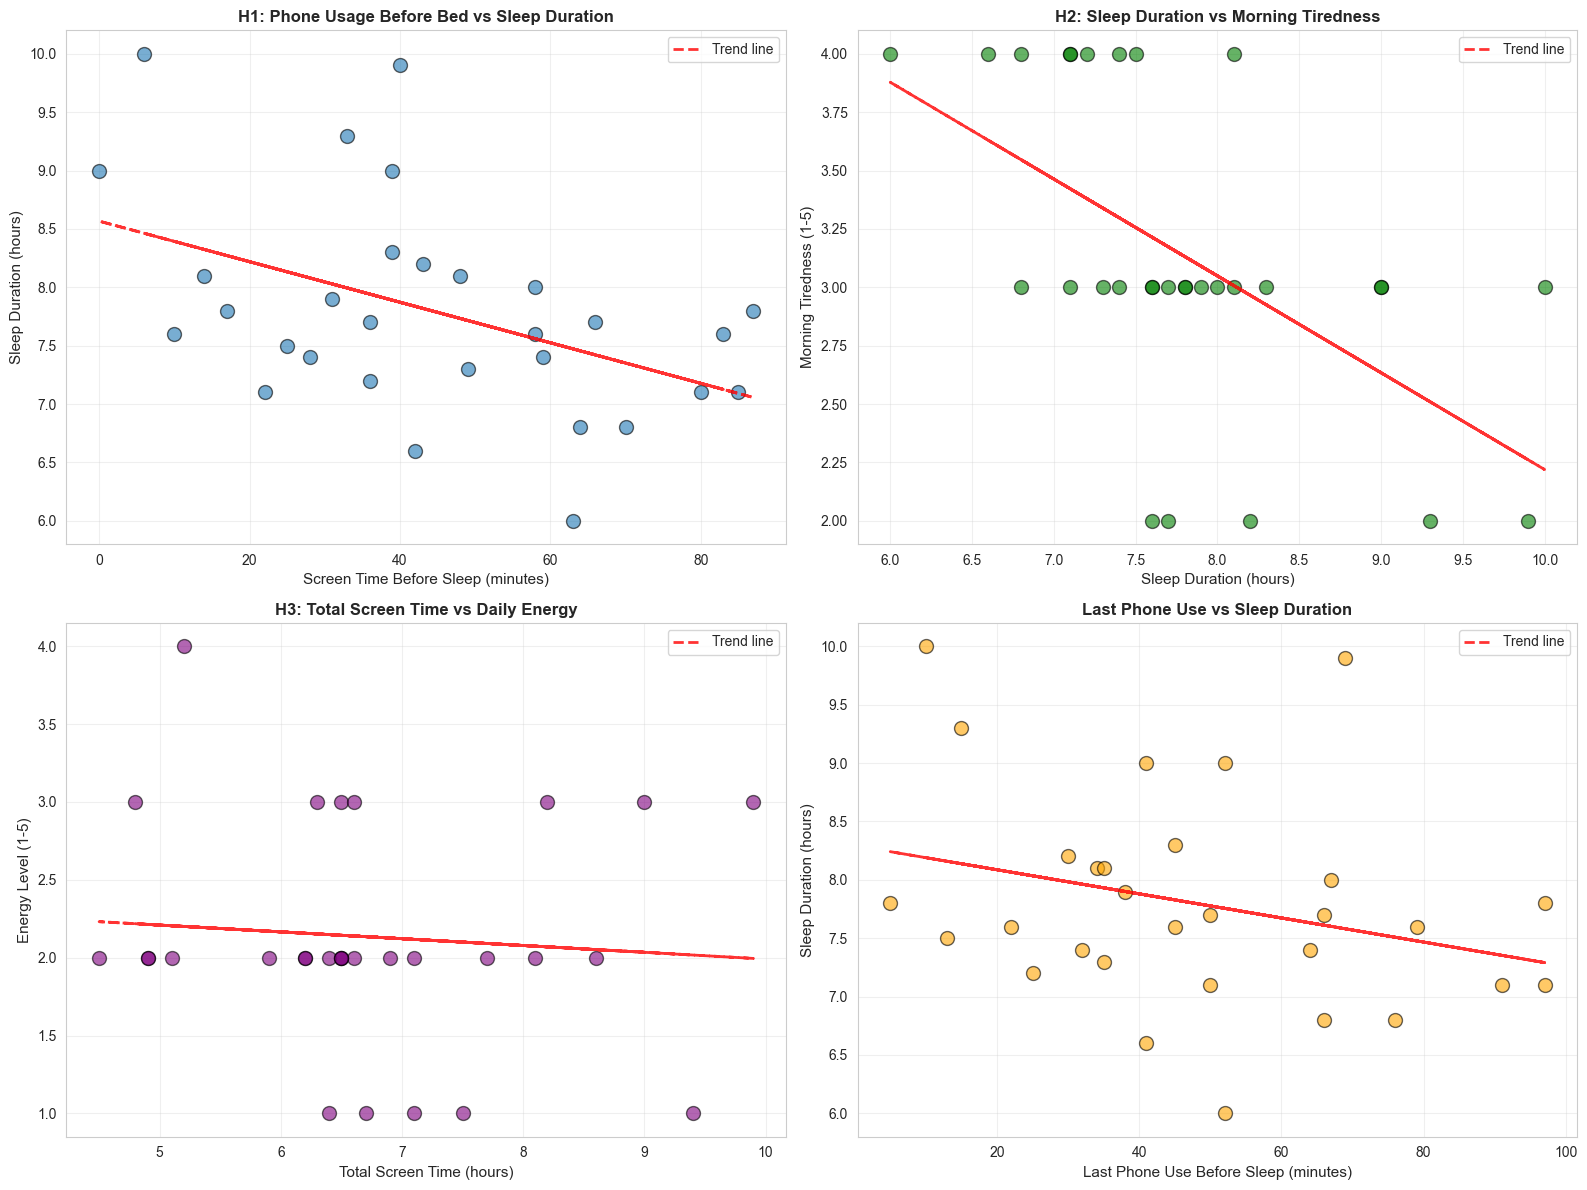

In [15]:
# Scatter plots for hypothesis relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# H1: Phone usage before bed vs Sleep duration
axes[0, 0].scatter(df['screen_time_before_sleep_min'], df['sleep_duration_hours'], 
                  alpha=0.6, s=100, edgecolors='black', linewidth=1)
z = np.polyfit(df['screen_time_before_sleep_min'], df['sleep_duration_hours'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['screen_time_before_sleep_min'], p(df['screen_time_before_sleep_min']), 
               "r--", alpha=0.8, linewidth=2, label=f'Trend line')
axes[0, 0].set_xlabel('Screen Time Before Sleep (minutes)', fontsize=11)
axes[0, 0].set_ylabel('Sleep Duration (hours)', fontsize=11)
axes[0, 0].set_title('H1: Phone Usage Before Bed vs Sleep Duration', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# H2: Sleep duration vs Morning tiredness
axes[0, 1].scatter(df['sleep_duration_hours'], df['morning_tiredness_1_5'], 
                  alpha=0.6, s=100, edgecolors='black', linewidth=1, color='green')
z = np.polyfit(df['sleep_duration_hours'], df['morning_tiredness_1_5'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['sleep_duration_hours'], p(df['sleep_duration_hours']), 
               "r--", alpha=0.8, linewidth=2, label=f'Trend line')
axes[0, 1].set_xlabel('Sleep Duration (hours)', fontsize=11)
axes[0, 1].set_ylabel('Morning Tiredness (1-5)', fontsize=11)
axes[0, 1].set_title('H2: Sleep Duration vs Morning Tiredness', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# H3: Total screen time vs Daily energy
axes[1, 0].scatter(df['total_screen_time_hours'], df['energy_level_1_5'], 
                  alpha=0.6, s=100, edgecolors='black', linewidth=1, color='purple')
z = np.polyfit(df['total_screen_time_hours'], df['energy_level_1_5'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['total_screen_time_hours'], p(df['total_screen_time_hours']), 
               "r--", alpha=0.8, linewidth=2, label=f'Trend line')
axes[1, 0].set_xlabel('Total Screen Time (hours)', fontsize=11)
axes[1, 0].set_ylabel('Energy Level (1-5)', fontsize=11)
axes[1, 0].set_title('H3: Total Screen Time vs Daily Energy', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Additional: Last phone use vs Sleep duration
axes[1, 1].scatter(df['last_phone_use_minutes_before_sleep'], df['sleep_duration_hours'], 
                  alpha=0.6, s=100, edgecolors='black', linewidth=1, color='orange')
z = np.polyfit(df['last_phone_use_minutes_before_sleep'], df['sleep_duration_hours'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df['last_phone_use_minutes_before_sleep'], p(df['last_phone_use_minutes_before_sleep']), 
               "r--", alpha=0.8, linewidth=2, label=f'Trend line')
axes[1, 1].set_xlabel('Last Phone Use Before Sleep (minutes)', fontsize=11)
axes[1, 1].set_ylabel('Sleep Duration (hours)', fontsize=11)
axes[1, 1].set_title('Last Phone Use vs Sleep Duration', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Summary of EDA Findings


In [16]:
print("EDA Summary:")
print("=" * 80)
print(f"\nDataset: {len(df)} days of data")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"\nKey Statistics:")
print(f"  Average sleep duration: {df['sleep_duration_hours'].mean():.2f} hours")
print(f"  Average screen time before sleep: {df['screen_time_before_sleep_min'].mean():.1f} minutes")
print(f"  Average total screen time: {df['total_screen_time_hours'].mean():.2f} hours")
print(f"  Average morning tiredness: {df['morning_tiredness_1_5'].mean():.2f} (1-5 scale)")
print(f"  Average energy level: {df['energy_level_1_5'].mean():.2f} (1-5 scale)")
print(f"\nKey Correlations:")
print(f"  Phone usage before bed vs Sleep: {df['screen_time_before_sleep_min'].corr(df['sleep_duration_hours']):.3f}")
print(f"  Sleep duration vs Tiredness: {df['sleep_duration_hours'].corr(df['morning_tiredness_1_5']):.3f}")
print(f"  Total screen time vs Energy: {df['total_screen_time_hours'].corr(df['energy_level_1_5']):.3f}")


EDA Summary:

Dataset: 30 days of data
Date range: 2024-11-01 to 2024-11-30

Key Statistics:
  Average sleep duration: 7.80 hours
  Average screen time before sleep: 44.4 minutes
  Average total screen time: 6.74 hours
  Average morning tiredness: 3.13 (1-5 scale)
  Average energy level: 2.13 (1-5 scale)

Key Correlations:
  Phone usage before bed vs Sleep: -0.455
  Sleep duration vs Tiredness: -0.557
  Total screen time vs Energy: -0.082
